# Model Fine-Tuning

- Learn several metrics and visualizing
- Optimize classification and regression with hyperparameter tuning

---

## Why Metrics Do not Always Work?

Conflict on a dataframe with class imbalance may not work.

Example: If your model is trained on dataset with 99% being `yes` and 1% being `no`, you could build a model that predicts none of the observation as `no` and if you use the simple ratio of correct / number of total observation, it could reflect a 99% accuracy.

---

## Confusion Matrix in Assessing Classifier

to be able to do confusion matrix and its metircs, we follow:
- Import the `classification_report` and `confusion_matrix`
- Intantiate a classification model
- Fit
- Predict
- Print the confusion matrix
- print the classification report

```python
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
```

The following are the tools/arguments use for confusion matrix and classification report:

**Arguments**

| Arguments       | Description                                                   | Syntax                                      |
|----------------|---------------------------------------------------------------|---------------------------------------------|
| y_true         | Actual labels for the test data                               | `confusion_matrix(y_true, y_pred)`          |
| y_pred         | Predicted labels for the test data                            | `confusion_matrix(y_true, y_pred)`          |
| labels         | List of labels to index the matrix                            | `confusion_matrix(y_true, y_pred, labels=)` |
| target_names   | List of target names to index the report                      | `classification_report(y_true, y_pred, target_names=)` |
| output_dict    | If True, return output as dict                                | `classification_report(y_true, y_pred, output_dict=)` |
| digits         | Number of digits for formatting output                        | `classification_report(y_true, y_pred, digits=)` |

**Functions**

| Functions            | Description                                                   | Syntax                                      |
|----------------------|---------------------------------------------------------------|---------------------------------------------|
| confusion_matrix     | Computes the confusion matrix to evaluate the accuracy of a classification | `confusion_matrix(y_true, y_pred)`          |
| classification_report| Builds a text report showing the main classification metrics  | `classification_report(y_true, y_pred, target_names=, output_dict=, digits=)` |


## Confusion Matrix with Cross-Validation

---

- Aggregate the results from all folds to get a comprehensive evaluation of the model's performance.
- Use k-fold cross-validation to split the data into k folds.
- For each fold:
  - Use the fold as the test set (`y_true`).
  - Use the remaining k-1 folds as the training set.
  - Train the model on the training set.
  - Predict the labels for the test set (`y_pred`).
  - Store the true and predicted labels.
- Combine the true labels and predicted labels from all folds.
- Compute the overall confusion matrix using the aggregated true and predicted labels.

**Flow of Cross-Validation for Confusion Matrix:**

1. **Initialize K-Fold Cross-Validation**: 
   - Define the number of folds (e.g., `kf = KFold(n_splits=5, shuffle=True, random_state=42)`).

2. **Prepare Lists for Aggregation**:
   - Initialize empty lists to store true and predicted labels (`all_y_true = []`, `all_y_pred = []`).

3. **Iterate Through Folds**:
   - For each fold:
     - Split the data into training and testing sets.
     - Train the model on the training set.
     - Predict the labels for the test set.
     - Append the true and predicted labels to the respective lists.

4. **Aggregate Results**:
   - Combine the true labels and predicted labels from all folds into single lists.

5. **Compute Confusion Matrix**:
   - Use the aggregated true and predicted labels to compute the overall confusion matrix (`cm = confusion_matrix(all_y_true, all_y_pred)`).

**Example Code**:

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Create a sample DataFrame
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Target': np.random.choice([0, 1], size=100)
}
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store true and predicted values
all_y_true = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[test_index]
    
    # Instantiate and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict the target values for the test set
    y_pred = model.predict(X_test)
    
    # Store the true and predicted values
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

# Compute the overall confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)

print("Overall Confusion Matrix:")
print(cm)


## Logistic  Regression and ROC Curve

---

Logistic Regression is a classification algorithm and follows the same flow as any other algorithms:

```python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model.fit(X_train, y_train)
model.predict(X_test)
```

**Functions**  

| Function               | Description                                      | Syntax                        |
|------------------------|--------------------------------------------------|-------------------------------|
| `LogisticRegression`   | Instantiates a logistic regression classifier   | `LogisticRegression()`        |
| `fit`                 | Trains the model on training data                | `model.fit(X_train, y_train)` |
| `predict`             | Makes predictions on test data                   | `model.predict(X_test)`       |
| `predict_proba`       | Predicts class probabilities                     | `model.predict_proba(X_test)` |
| `roc_curve`           | Computes ROC curve values                        | `roc_curve(y_test, y_pred_probs)` |
| `roc_auc_score`       | Computes AUC score                               | `roc_auc_score(y_test, y_pred_probs)` |

**Arguments**  

| Argument              | Description                                        | Syntax                           |
|----------------------|--------------------------------------------------|---------------------------------|
| `X_train`           | Training data features                            | `model.fit(X_train, y_train)`  |
| `y_train`           | Training data labels                              | `model.fit(X_train, y_train)`  |
| `X_test`            | Test data features                                | `model.predict(X_test)`        |
| `y_test`            | Test data labels                                  | `roc_curve(y_test, y_pred_probs)` |
| `y_pred_probs`      | Predicted probabilities from `predict_proba`      | `roc_curve(y_test, y_pred_probs)` |


- ROC helps identify which threshold is the best (actually depending on what you want to get)
- AUC helps identify which algorithm is the best algorithm, having greater area means better model

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

churn_df = pd.read_csv("Churn.csv")
churn_df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [9]:
X = churn_df.drop("churn", axis = 1).values
y = churn_df['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

C:\Users\magan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8500749625187406

[[563   3]
 [ 97   4]]


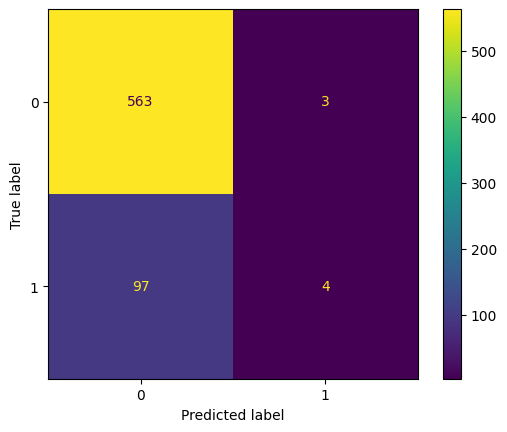

In [18]:
# printing the confusion matrx
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [23]:
# predicting the probabilities 
y_pred_probs = model.predict_proba(X_test)
y_pred_probs
# did not churn and did churn

array([[0.90744886, 0.09255114],
       [0.97661744, 0.02338256],
       [0.8362232 , 0.1637768 ],
       ...,
       [0.93801288, 0.06198712],
       [0.97569096, 0.02430904],
       [0.94923362, 0.05076638]])

### ROC Curve

**ROC Graph shows you how threshold affects True positive rate and False positive rate**

[0.         0.         0.         0.00176678 0.00176678 0.00530035
 0.00530035 0.00706714 0.00706714 0.00883392 0.00883392 0.01766784
 0.01766784 0.01943463 0.01943463 0.02120141 0.02120141 0.02473498
 0.02473498 0.02826855 0.02826855 0.03003534 0.03003534 0.0335689
 0.0335689  0.03533569 0.03533569 0.03710247 0.03710247 0.04240283
 0.04240283 0.04416961 0.04416961 0.0459364  0.0459364  0.04946996
 0.04946996 0.05123675 0.05123675 0.05477032 0.05477032 0.0565371
 0.0565371  0.05830389 0.05830389 0.06183746 0.06183746 0.07067138
 0.07067138 0.07773852 0.07773852 0.08303887 0.08303887 0.08480565
 0.08480565 0.08657244 0.08657244 0.09010601 0.09010601 0.09187279
 0.09187279 0.09717314 0.09717314 0.10954064 0.10954064 0.12720848
 0.12720848 0.13427562 0.13427562 0.13780919 0.13780919 0.14134276
 0.14134276 0.14487633 0.14487633 0.15194346 0.15194346 0.16254417
 0.16254417 0.17667845 0.17667845 0.18904594 0.18904594 0.20318021
 0.20318021 0.21378092 0.21378092 0.22791519 0.22791519 0.236749

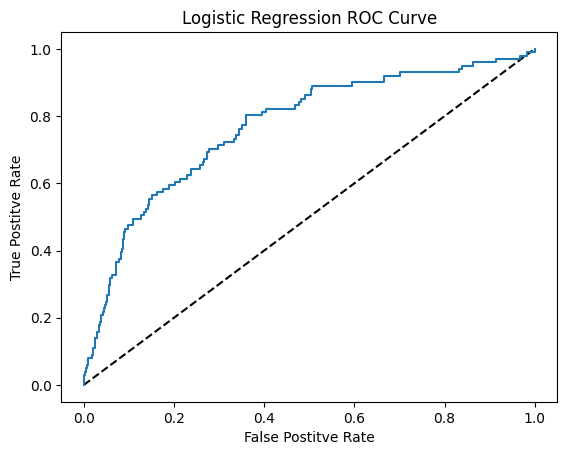

In [39]:
# I wonder why we use just the did churn
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
print(fpr, tpr, thresholds)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Postitve Rate")
plt.ylabel("True Postitve Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### AUC 

We use AUC to determine the performance of the model. The score ranges from 0 - 1, 1 being the ideal.

In [41]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs[:, 1]))

0.7685162509183779


### Why Use the Second Column in `model.predict_proba(X_test)` for ROC and AUC?

In binary classification, the `predict_proba` method of a classifier returns a 2D array with the probabilities for each class. The columns in this array correspond to the classes in the order they appear in the model's `classes_` attribute.

#### Example:
For a binary classification problem with classes "churned" and "did not churn," the `predict_proba` method returns probabilities for both classes:

```python
probabilities = model.predict_proba(X_test)
print(probabilities)


In [44]:
# The output might look like this
y_pred_probs


array([[0.90744886, 0.09255114],
       [0.97661744, 0.02338256],
       [0.8362232 , 0.1637768 ],
       ...,
       [0.93801288, 0.06198712],
       [0.97569096, 0.02430904],
       [0.94923362, 0.05076638]])

Positive Class: The second column `([:, 1])` contains the probabilities for the positive class (e.g., "churned"). This is the class of interest when evaluating the model's performance.

## Which Metric To Use?

---
These different metrics give you different conclusions about your model, for instance the confusion matrix gives you the true positive rate, the `.score()` gives you the accuracy and the AUC gives you the power of the model regardless of the threshold.

**When to Use AUC?**
- Imbalanced Datasets: If your dataset is imbalanced (one class is much more frequent than the other), AUC is a better metric because it evaluates the model's ability to distinguish between classes regardless of the threshold.

- Ranking Performance: If you care about the ranking of predictions (e.g., prioritizing high-risk cases), AUC is useful because it measures the model's ability to rank positive instances higher than negative ones.

- Threshold Selection: If you need to select an optimal threshold for classification, the ROC curve and AUC can help you understand the trade-offs between true positive rate and false positive rate at different thresholds.

**When to Use Accuracy?**
- Balanced Datasets: If your dataset is balanced (both classes are equally represented), accuracy can be a good metric because it measures the overall correctness of the model's predictions.

- Simple Evaluation: If you need a straightforward and easy-to-understand metric, accuracy provides a clear measure of how often the model's predictions are correct.

- General Performance: If you want a quick assessment of the model's general performance, accuracy can give you a good indication of how well the model is doing overall.

**Example Scenarios**
- Imbalanced Dataset: If you're working on a fraud detection problem where fraudulent transactions are rare, AUC is a better metric because it focuses on the model's ability to identify the rare positive cases.

- Balanced Dataset: If you're working on a spam detection problem where spam and non-spam emails are equally represented, accuracy can be a good metric to evaluate the model's performance.


## Hyperparameter Tuning

---

Hyperparameter Tuning means:
1. Try lots of different hyperparamter values
2. Fit all of them separately
3. See how well they perform
4. Choose the best performing values

**Note**: 
- It is essential to use cross-validation to avoid overfitting to the test set
- We can still split the data and perform crosss-validation on the training set
- We withold the test set for the final evaluation

### Grid Search Cross-Validation and Randomized Search
- We choose possible hyperparamter values to try with metrics.
- You can actually do this with loops but it is inconvenient. The following are the functions and their respective arguments to use when you want to do hyperparamter tuning.

**The Flow of Tuning your Model Follows:**

- Import
- Define the classifier (gridsearchcv or randomizedsearchcv)
- Model training using the classifier object
- Print the result



**Grid Search:**

```python
from sklearn.model_selection import GridSearchCV

# instantiate kfold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, {"alpha": np.arange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}, cv = kf)

ridge_cv.fit(X_train, y_train) # remeber that you need to withold your testing data
ridge_cv.results_
```

```python
# Results are difficult to view, we can transform it into a dataframe
df = pd.DataFrame(ridge_cv.results_)
```

**Randomized Search:**

```python
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

ridge = Ridge()

ridge_cv = RandomizedSearchCV(ridge, param_grid = {"alpha": np.arange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}, cv = kf, n_iter = 2)

ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)
```

**Evaluating on the test set:**

To know how well the model (with tuning) does on the test set, we can do:

```python
test_score = ridge_cv.score(X_test, y_test)
print(test_score) # the test score depends on the value you assigned to the "scoring" param

**Functions**

| Function          | Description                                      | Syntax                                                                 |
|-------------------|--------------------------------------------------|-----------------------------------------------------------------------|
| `GridSearchCV`    | Performs an exhaustive search over a parameter grid. | `GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score=False)` |
| `RandomizedSearchCV` | Performs a random search over a parameter grid. | `RandomizedSearchCV(estimator, param_grid, n_iter=10, scoring=None, n_jobs=None, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score='raise-deprecating', return_train_score=False)` |

**Arguments**

| Argument          | Description                                      | Syntax                                                                 |
|-------------------|--------------------------------------------------|-----------------------------------------------------------------------|
| `estimator`       | The model or pipeline to be optimized.           | `GridSearchCV(estimator=model, ...)`                                  |
| `param_grid`      | Dictionary with parameters names as keys and lists of parameter settings to try as values. | `GridSearchCV(param_grid={'param1': [], 'param2': []}, ...)` |
| `param_distributions` | Dictionary with parameters names as keys and distributions or lists of parameters to try. | `RandomizedSearchCV(param_distributions={'param1': [], 'param2': []}, ...)` |
| `scoring`         | A string or callable to evaluate the predictions on the test set. | `GridSearchCV(scoring='accuracy', ...)`                               |
| `n_jobs`          | Number of jobs to run in parallel.               | `GridSearchCV(n_jobs=-1, ...)`                                        |
| `cv`              | Cross-validation splitting strategy.             | `GridSearchCV(cv=5, ...)`                                             |
| `verbose`         | Controls the verbosity.                          | `GridSearchCV(verbose=1, ...)`                                        |
| `pre_dispatch`    | Controls the number of jobs that get dispatched during parallel execution. | `GridSearchCV(pre_dispatch='2*n_jobs', ...)`                          |
| `error_score`     | Value to assign to the score if an error occurs.  | `GridSearchCV(error_score='raise-deprecating', ...)`                  |
| `return_train_score` | If `False`, the `cv_results_` attribute will not include training scores. | `GridSearchCV(return_train_score=False, ...)`                         |
| `n_iter`          | Number of parameter settings that are sampled.   | `RandomizedSearchCV(n_iter=10, ...)`                                  |
| `random_state`    | Controls the randomness of the parameter search. | `RandomizedSearchCV(random_state=42, ...)`                            |


END